In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import HTML

In [8]:
# function to display figures with formatting and caption
def display_figure(fig, fig_id, caption, w=0.6, fs=12):
    import io
    import base64
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    pic_IObytes = io.BytesIO()
    
    # set fontsize for title and labels        
    for ax in fig.axes:
        text_items = [ax.title, ax.xaxis.label, ax.yaxis.label]
        if ax.get_legend() is not None:
            text_items = text_items + ax.get_legend().get_texts()
        for item in (text_items + ax.get_xticklabels() + ax.get_yticklabels() ):
            item.set_fontsize(fs)
            
    plt.savefig(pic_IObytes,  format='png', bbox_inches='tight')
    pic_IObytes.seek(0)
    pic_hash = base64.b64encode(pic_IObytes.read())
    img = f'<img margin="auto" width="{w*100}%" src="data:image/png;base64, {str(pic_hash)[2:-1]}" />'
    caption = f'<figcaption style="text-align: center; font-style: italic;">{caption}</figcaption>'
    display(HTML(f'<br><fig width="100%" id={fig_id}><center>{img}</center> {caption}</fig><br>'))
    plt.close(fig)

In [2]:
#read data from csv file
filename = "ans_responses.csv"
ans_df = pd.read_csv(filename)

filename = "math_ability_responses.csv"
maths_df = pd.read_csv(filename)

filename = "memory_test_responses.csv"
memory_df = pd.read_csv(filename)

filename = "spatial_recognition_responses.csv"
sr_df = pd.read_csv(filename)

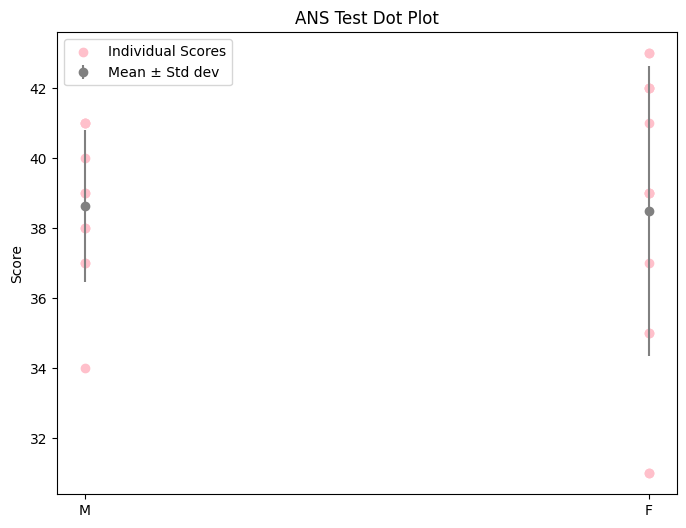

In [3]:
#calculate mean and standard deviation for males and females
ans_std_scores = ans_df.groupby('gender')['score'].std()
ans_mean_scores = ans_df.groupby('gender')['score'].mean()

#create a dot plot with error bars
plt.figure(figsize=(8,6))
plt.scatter(ans_df['gender'], ans_df['score'], color = 'pink', label='Individual Scores')

#displaying error bars on the graph
plt.errorbar(ans_mean_scores.index, ans_mean_scores, yerr=ans_std_scores, fmt='o', color='grey', label='Mean ± Std dev')

plt.ylabel('Score')
plt.title('ANS Test Dot Plot')
plt.legend()

#show dot plot
plt.show()

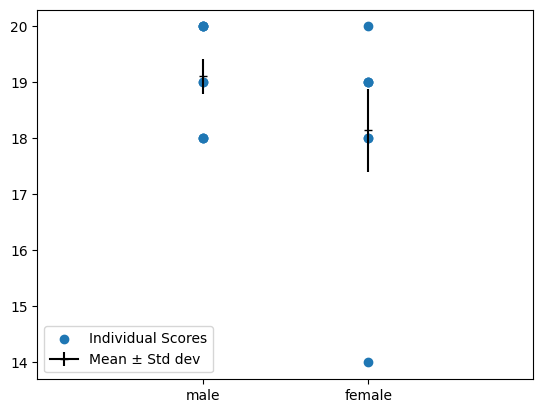

In [4]:
#male and female score pulled out from data
male_scores = maths_df[maths_df['gender'] == 'male']['score']
female_scores = maths_df[maths_df['gender'] == 'female']['score']

#plot dot graph 
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(maths_df['gender'],maths_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax.set_xlim(-1,2) 

#score categorised by gender
m_df = male_scores 
f_df = female_scores

#mean 
m_mean = m_df.mean()
f_mean = f_df.mean()

#standard_error of both gender 
m_std_error = stats.sem(m_df)
f_std_error = stats.sem(f_df)

#draw the mean with error bars 
ax.scatter(maths_df['gender'], maths_df['score'], label='Individual Scores')
ax.errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black',label='Mean ± Std dev')
ax.errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

plt.legend()


plt.show()

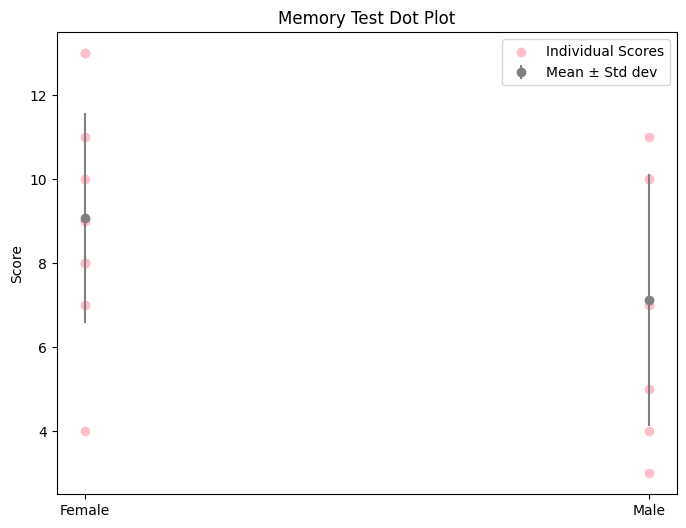

In [5]:
#calculate mean and standard deviation for males and females
memory_std_scores = memory_df.groupby('gender')['total_score'].std()
memory_mean_scores = memory_df.groupby('gender')['total_score'].mean()

#create a dot plot with error bars
plt.figure(figsize=(8,6))
plt.scatter(memory_df['gender'], memory_df['total_score'], color = 'pink', label='Individual Scores')
plt.errorbar(memory_mean_scores.index, memory_mean_scores, yerr=memory_std_scores, fmt='o', color='grey', label='Mean ± Std dev')
plt.ylabel('Score')
plt.title('Memory Test Dot Plot')
plt.legend()
plt.show()

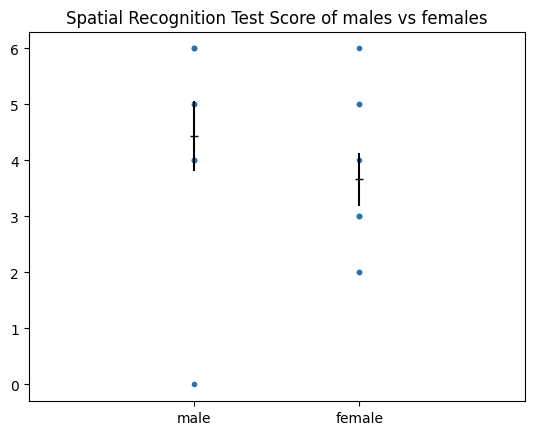

In [6]:
#male and female score pulled out from data
male_scores = sr_df[sr_df['sex'] == 'male']['score']
female_scores = sr_df[sr_df['sex'] == 'female']['score']

#plot dot graph 
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(sr_df['sex'],sr_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax.set_xlim(-1,2) 

#score categorised by sex
m_df = male_scores 
f_df = female_scores

#mean 
m_mean = m_df.mean()
f_mean = f_df.mean()

#standard_error of both sex 
m_std_error = stats.sem(m_df)
f_std_error = stats.sem(f_df)

#draw the mean with error bars 
#ax.scatter(sr_df['sex'], sr_df['score'], label='Individual Scores')
ax.errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black')
ax.errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

ax.set_title("Spatial Recognition Test Score of males vs females")
#plt.legend()

plt.show()

TypeError: 'Axes' object is not subscriptable

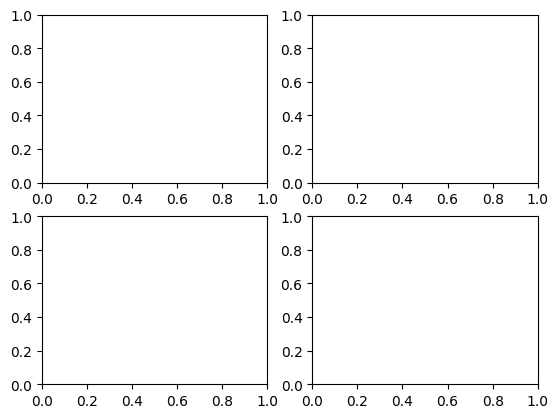

In [7]:
#show all 4 box plots in 2x2 grid
fig.ax = plt.subplots(2,2)

#dot plot for ANS
#ax[0.0].dotplot([ans_male_scores, ans_female_scores], labels
ax[0,1].errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black')
ax[0,1].errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

In [ ]:
# apply t-tests to look at differences between Old and m groups

ans_male_df = ans_df.query('gender=="M"')
ans_female_df = ans_df.query('gender=="F"')


fig = plt.figure(figsize=(8,8))
fig = plt.figure(figsize=(8,8))

# t-test and plot for SDNN
ax1 = fig.add_subplot(2,2,1)

ax1.plot(ans_df['gender'],ans_df['score'],'.')
# for 2 categories the x-axis limits
# range from 0 to 1
# adjust for nicer spacing in this case
ax1.set_xlim(-1,2)

ans_male_mean = ans_male_df['score'].mean()
ans_male_std_err = stats.sem(ans_male_df['score'])

ans_female_mean = ans_female_df['score'].mean()
ans_female_std_err = stats.sem(ans_female_df['score'])

# draw the mean with error bars 
ax1.errorbar('male',ans_male_mean,  yerr=ans_male_std_err,  marker='_',  color='black')
ax1.errorbar('female',ans_female_mean,  yerr=ans_female_std_err,  marker='_',  color='black')


In [ ]:
fig = plt.figure(figsize=(8,8))

#ANS (1)
ans_male_scores = ans_df[ans_df['gender'] == 'M']['score']
ans_female_scores = ans_df[ans_df['gender'] == 'F']['score']

#plot dot graph 
ax1 = fig.add_subplot(2,2,1)
ax1.plot(ans_df['gender'],ans_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax1.set_xlim(-1,2) 

#score categorised by gender
ans_male_df = ans_male_scores 
ans_female_df = ans_female_scores

#mean 
ans_male_mean = ans_male_df.mean()
ans_female_mean = ans_female_df.mean()

#standard_error of both gender 
ans_male_std_error = stats.sem(ans_male_df)
ans_female_std_error = stats.sem(ans_female_df)

#draw the mean with error bars 
ax1.errorbar('M', ans_male_mean, yerr= ans_male_std_error, marker='_', color='black',label='Mean ± Std dev')
ax1.errorbar('F', ans_female_mean, yerr= ans_female_std_error, marker='_', color='black')

ax1.set_title("ANS Test")

#MATH ABILITY (2)
#male and female score pulled out from data
male_scores = maths_df[maths_df['gender'] == 'male']['score']
female_scores = maths_df[maths_df['gender'] == 'female']['score']

#plot dot graph 
ax2 = fig.add_subplot(2,2,2)
ax2.plot(maths_df['gender'],maths_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax2.set_xlim(-1,2) 

#score categorised by gender
m_df = male_scores 
f_df = female_scores

#mean 
m_mean = m_df.mean()
f_mean = f_df.mean()

#standard_error of both gender 
m_std_error = stats.sem(m_df)
f_std_error = stats.sem(f_df)

#draw the mean with error bars 
ax2.errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black',label='Mean ± Std dev')
ax2.errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

ax2.set_title("Math Ability")

#MEMORY TEST (3)
#male and female score pulled out from data
memory_male_scores = memory_df[memory_df['gender'] == 'Male']['total_score']
memory_female_scores = memory_df[memory_df['gender'] == 'Female']['total_score']

#plot dot graph 
ax3 = fig.add_subplot(2,2,3)

ax3.plot(memory_df['gender'],memory_df['total_score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax3.set_xlim(-1,2) 

#score categorised by sex
memory_m_df = memory_male_scores 
memory_f_df = memory_female_scores

#mean 
memory_m_mean = memory_m_df.mean()
memory_f_mean = memory_f_df.mean()

#standard_error of both sex 
memory_m_std_error = stats.sem(memory_m_df)
memory_f_std_error = stats.sem(memory_f_df)

#draw the mean with error bars 
ax3.errorbar('Male', memory_m_mean, yerr=memory_m_std_error, marker='_', color='black')
ax3.errorbar('Female', memory_f_mean, yerr=memory_f_std_error, marker='_', color='black')

ax3.set_title("Memory Test")

#SPATIAL REASONING (4)
#male and female score pulled out from data
male_scores = sr_df[sr_df['sex'] == 'male']['score']
female_scores = sr_df[sr_df['sex'] == 'female']['score']

#plot dot graph 
ax4 = fig.add_subplot(2,2,4)

ax4.plot(sr_df['sex'],sr_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax4.set_xlim(-1,2) 

#score categorised by sex
m_df = male_scores 
f_df = female_scores

#mean 
m_mean = m_df.mean()
f_mean = f_df.mean()

#standard_error of both sex 
m_std_error = stats.sem(m_df)
f_std_error = stats.sem(f_df)

#draw the mean with error bars 
ax4.errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black')
ax4.errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

ax4.set_title("Spatial Recognition Test ")

caption = "Figure 4: Comparison of Males vs Females mean scores for all tests."

display_figure(fig, "fig4", caption, 0.6, 10)

fig = plt.figure(figsize=(4,4))